# CEE 690-02

# Environmental Spatial Data Analysis

# Boosting

# Boosting

* Also an ensemble method generally used with decision trees
* In Bagging and Random Forests all the trees are grown indepedently (i.e., in parallel)
* In Boosting the trees are grown sequentially by building on each other

**We are going to explain boosting from the regression perspective since it is easier to understand.** 

# Refresher: Regression trees

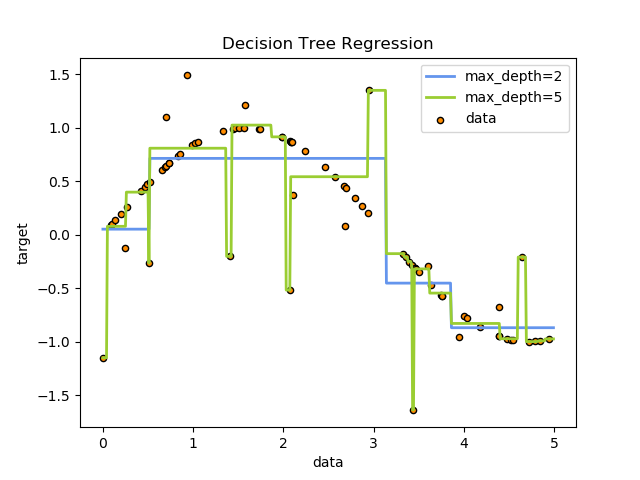

Overfitting? Notorious for fitting to the outliers. 

# Synthetic example

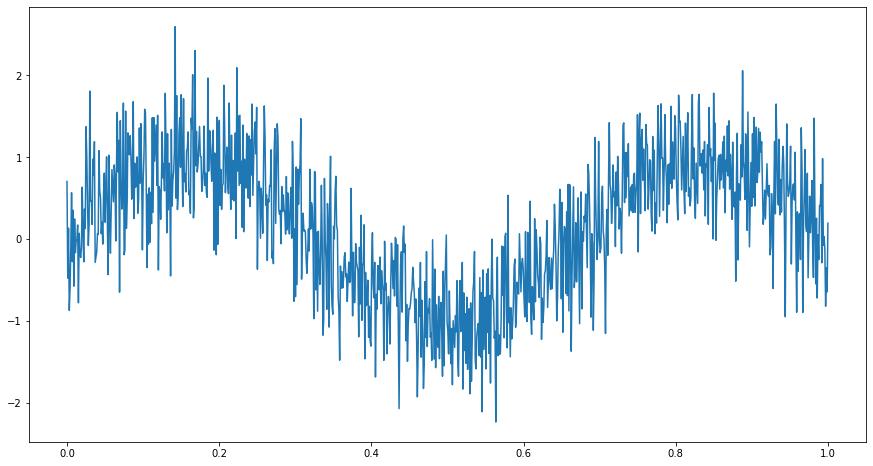

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(0,1,1000)
#Create our sinuosoid
y0 = np.sin(x*np.pi*3)
#Create some Gaussian noise
y1 = 0.5*np.random.randn(x.size)
#Add the Gaussian noise to the sinusoiid
y = y0 + y1
#Add a second dimension for use in sklearn
X = x[:,np.newaxis]
#Plot!
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.show()

# Decision Tree

Test data: 0.227732


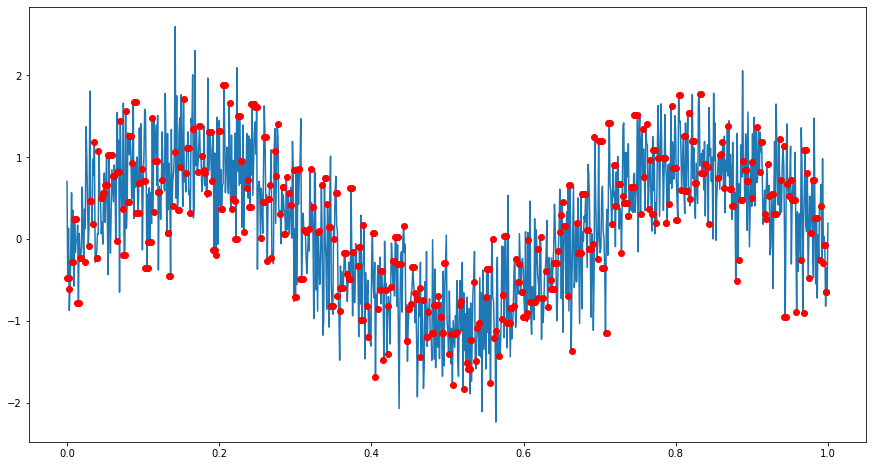

In [2]:
import sklearn.tree
import sklearn.model_selection
#Split into training and validation
(Xt,Xv,yt,yv) = sklearn.model_selection.train_test_split(X,y,train_size=0.5,shuffle=True,random_state=1)
#Decision tree
clf = sklearn.tree.DecisionTreeRegressor(random_state=1)
#Fit the tree
clf = clf.fit(Xt,yt)
#Determine the accuracy when using the test dataset
print('Test data: %f' % clf.score(Xv,yv))
#Make a plot
ypred = clf.predict(Xv)
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv[:,0],ypred,'ro')
plt.show()

# Random Forest

Test data: 0.473326


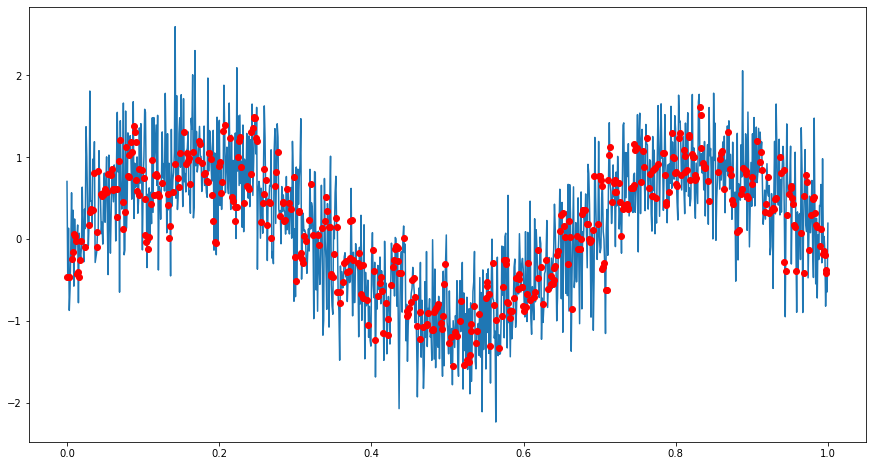

In [3]:
import sklearn.ensemble
#Split into training and validation
(Xt,Xv,yt,yv) = sklearn.model_selection.train_test_split(X,y,train_size=0.5,shuffle=True,random_state=1)
#Decision tree
clf = sklearn.ensemble.RandomForestRegressor(random_state=1,n_estimators=200)
#Fit the tree
clf = clf.fit(Xt,yt)
#Determine the accuracy when using the test dataset
print('Test data: %f' % clf.score(Xv,yv))
#Make a plot
ypred = clf.predict(Xv)
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv[:,0],ypred,'ro')
plt.show()

# Boosting

Test data: 0.605745


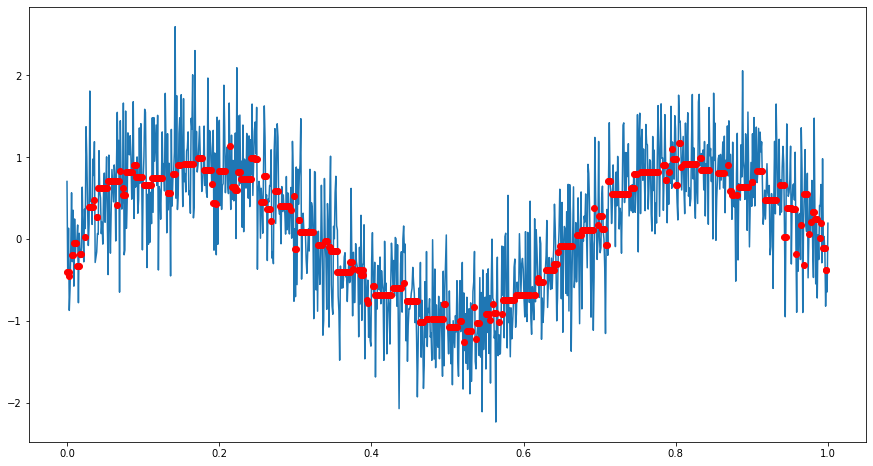

In [4]:
import sklearn.ensemble
#Split into training and validation
(Xt,Xv,yt,yv) = sklearn.model_selection.train_test_split(X,y,train_size=0.5,shuffle=True,random_state=1)
#Decision tree
clf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=100)
#Fit the tree
clf = clf.fit(Xt,yt)
#Determine the accuracy when using the test dataset
print('Test data: %f' % clf.score(Xv,yv))
#Make a plot
ypred = clf.predict(Xv)
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv[:,0],ypred,'ro')
plt.show()

# Comparison of methods

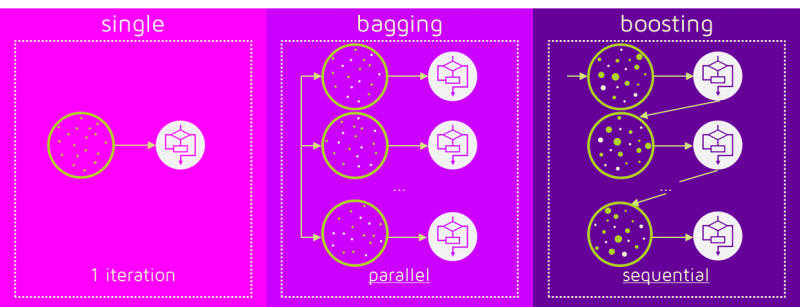

Source: https://www.kdnuggets.com/2017/11/difference-bagging-boosting.html

There are different types of "Boosting". We are going to look at Gradient Boosting Machines (GBM) which is one of the most commonly used. 

# Gradient Boosting Machines (GBM)

# Start by fitting the data with a "stump"

Note that it doesn't need to be a stump. However, the simpler the tree, the better to avoid fitting too fast.

Test data: 0.113525


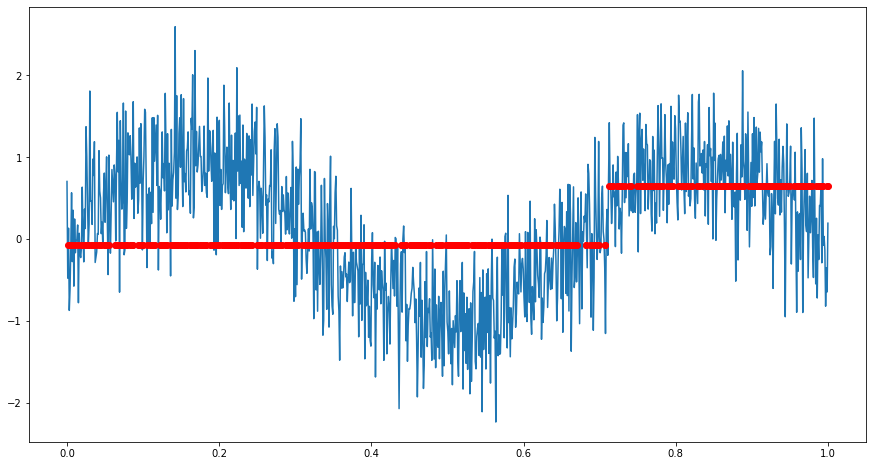

In [5]:
#Split into training and validation
(Xt,Xv,yt,yv) = sklearn.model_selection.train_test_split(X,y,train_size=0.5,shuffle=True,random_state=1)
#Decision tree
clf1 = sklearn.tree.DecisionTreeRegressor(max_depth=1,criterion="friedman_mse")
#Fit the tree
clf1 = clf1.fit(Xt,yt)
#Determine the accuracy when using the training dataset
print('Test data: %f' % clf1.score(Xv,yv))
#Make a plot
ypred = clf1.predict(Xt)
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xt[:,0],ypred,'ro')
plt.show()

# Compute the residuals of our predictions

$$ r = y - \hat{y}$$

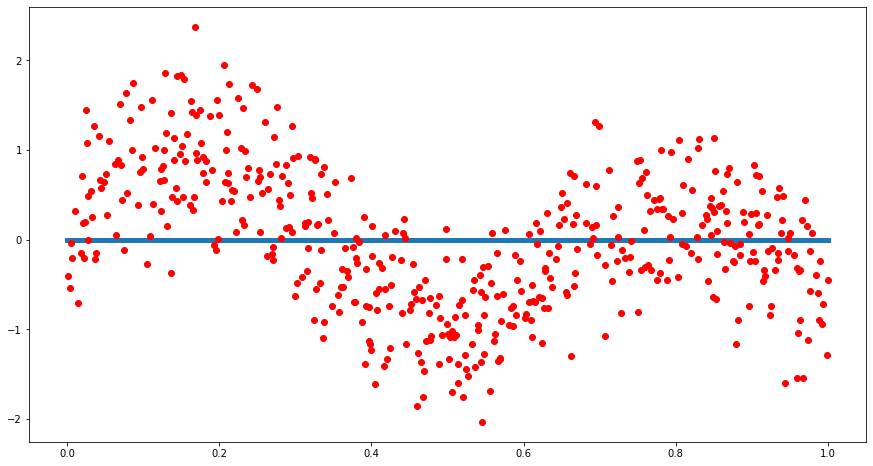

In [6]:
#Comput the residuals
rt = yt - ypred
plt.figure(figsize=(15,8))
plt.plot(X[:,0],np.zeros(X.shape[0]),lw=5)
plt.plot(Xt[:,0],rt,'ro')
plt.show()

# Fit another stump to the residuals

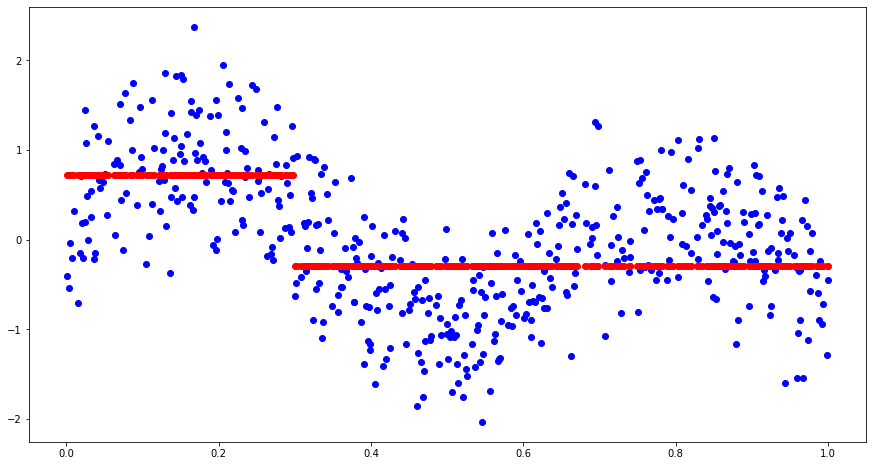

In [7]:
import sklearn.metrics
sklearn.metrics.r2_score
#Decision tree
clf2 = sklearn.tree.DecisionTreeRegressor(random_state=1,max_depth=1)
#Fit the tree
clf2 = clf2.fit(Xt,rt)
#Make a plot
rpred = clf2.predict(Xt)
plt.figure(figsize=(15,8))
plt.plot(Xt[:,0],rt,'bo')
plt.plot(Xt[:,0],rpred,'ro')
plt.show()

# Add the predictions of the two fitted decision trees

Test data: 0.425777


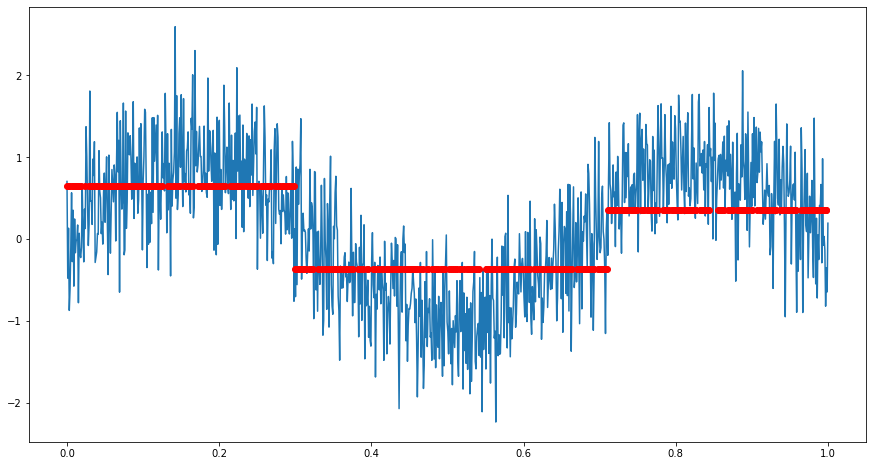

In [8]:
import scipy.stats
yp1 = clf1.predict(Xv)
yp2 = clf2.predict(Xv)
yp = yp1 + yp2
#Determine the accuracy when using the test dataset
print('Test data: %f' % sklearn.metrics.r2_score(yv,yp))
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv,yp,'ro')
plt.show()

We magically just improved our prediction substantially

## Gradient Boosting: Imagine iterating on that process for n trees

There is more to gradient boosting than what is happening in the following function. However, it should give you a general idea behind the concept.

In [9]:
def fit_adhoc_gbm(Xt,yt,ntrees):
    #Initialize list of trees
    clfs = []
    
    for i in range(ntrees):
        #Compute residuals
        if i == 0:
            rt = yt
        else: 
            rt = yt - ypred
        #Initialize clf 
        clf = sklearn.tree.DecisionTreeRegressor(max_depth=1)
        #Fit the tree
        clf = clf.fit(Xt,rt)
        #Compute prediction
        pred = clf.predict(Xt)
        #Add to ypred
        if i == 0:
            ypred = pred
        else:
            ypred = ypred + pred
        #Add clf to the list
        clfs.append(clf)
        
    #Return fitted trees
    return clfs

# Single decision tree

Test data: 0.113525


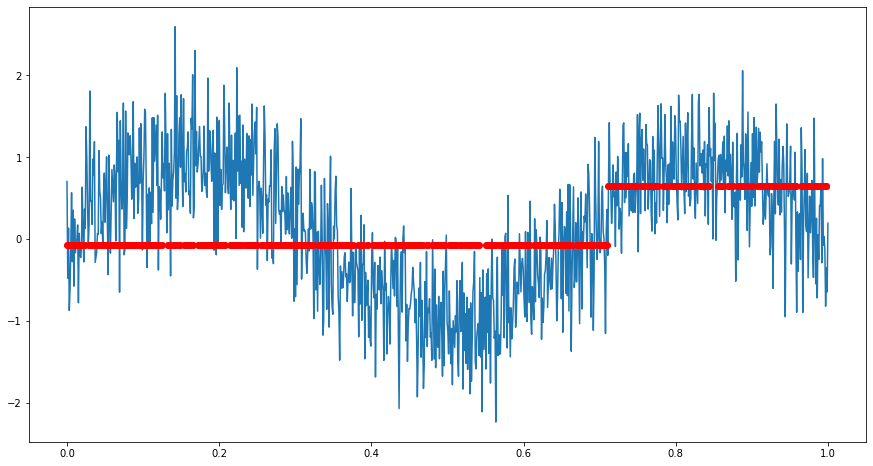

In [10]:
ntrees = 1
clfs = fit_adhoc_gbm(Xt,yt,ntrees)

#Make predictions from fitted GBM for the test dataset
for i in range(len(clfs)):
    if i == 0:yp = clfs[i].predict(Xv)
    else:yp += clfs[i].predict(Xv)
        
#Evaluate and plot the predictions
print('Test data: %f' % sklearn.metrics.r2_score(yv,yp))
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv,yp,'ro')
plt.show()

# Two decision trees

Test data: 0.425777


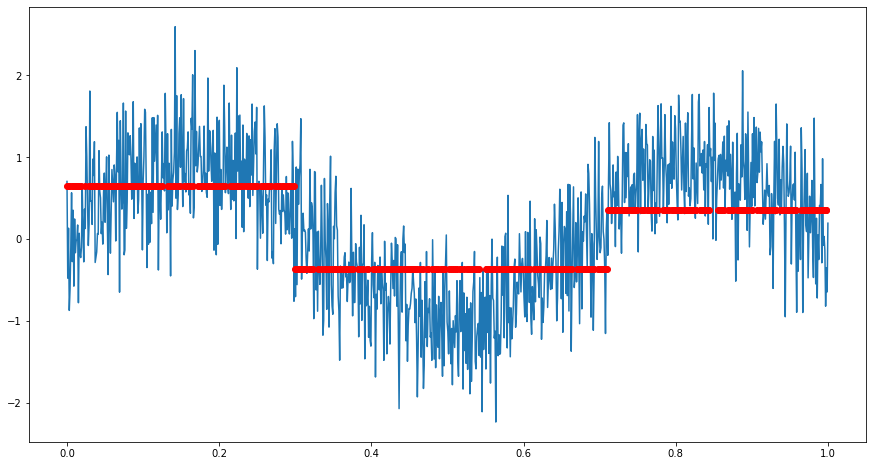

In [11]:
ntrees = 2
clfs = fit_adhoc_gbm(Xt,yt,ntrees)

#Make predictions from fitted GBM for the test dataset
for i in range(len(clfs)):
    if i == 0:yp = clfs[i].predict(Xv)
    else:yp += clfs[i].predict(Xv)
        
#Evaluate and plot the predictions
print('Test data: %f' % sklearn.metrics.r2_score(yv,yp))
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv,yp,'ro')
plt.show()

# Ten decision trees

Test data: 0.586493


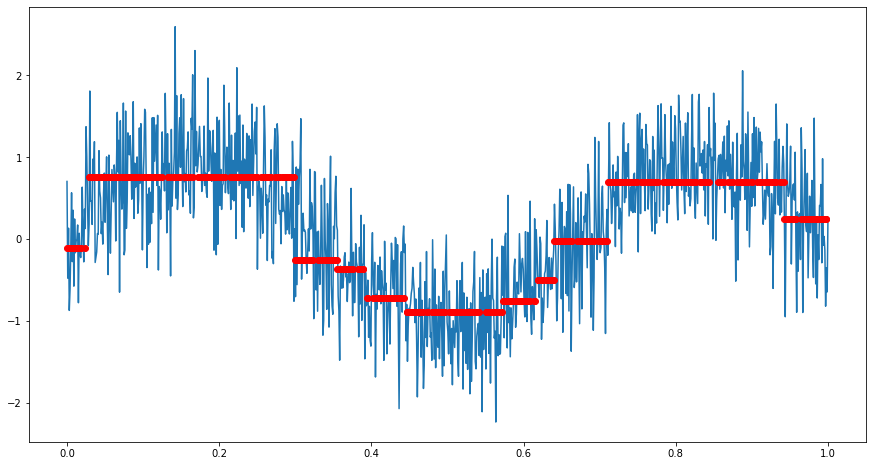

In [12]:
ntrees = 10
clfs = fit_adhoc_gbm(Xt,yt,ntrees)

#Make predictions from fitted GBM for the test dataset
for i in range(len(clfs)):
    if i == 0:yp = clfs[i].predict(Xv)
    else:yp += clfs[i].predict(Xv)
        
#Evaluate and plot the predictions
print('Test data: %f' % sklearn.metrics.r2_score(yv,yp))
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv,yp,'ro')
plt.show()

# One hundred decision trees

Test data: 0.605258


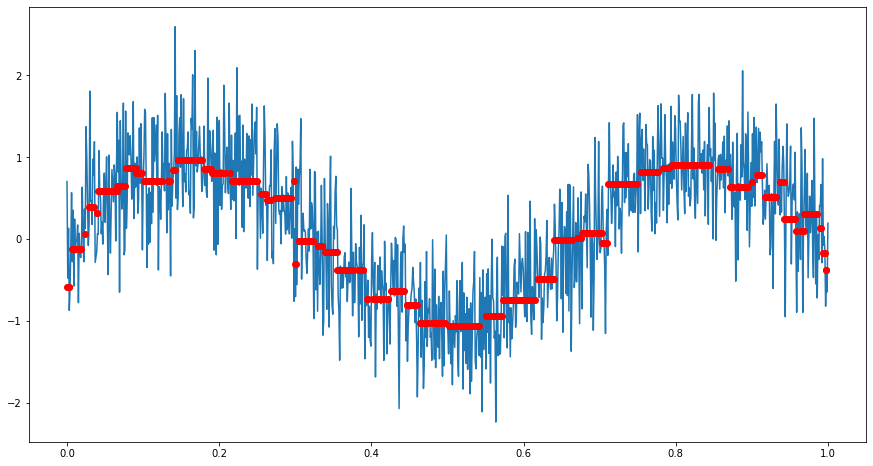

In [13]:
ntrees = 100
clfs = fit_adhoc_gbm(Xt,yt,ntrees)

#Make predictions from fitted GBM for the test dataset
for i in range(len(clfs)):
    if i == 0:yp = clfs[i].predict(Xv)
    else:yp += clfs[i].predict(Xv)
        
#Evaluate and plot the predictions
print('Test data: %f' % sklearn.metrics.r2_score(yv,yp))
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv,yp,'ro')
plt.show()

# Careful: Gradient Boosting can (and will) overfit

Test data: 0.556719


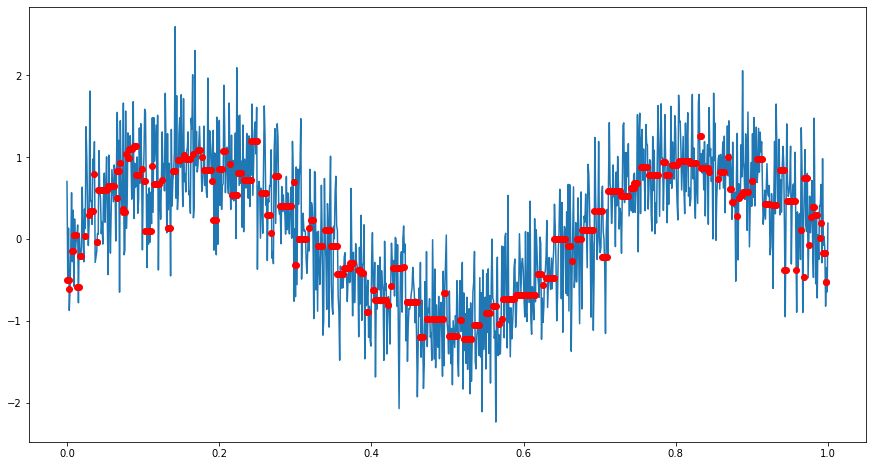

In [14]:
ntrees = 2000
clfs = fit_adhoc_gbm(Xt,yt,ntrees)

#Make predictions from fitted GBM for the test dataset
for i in range(len(clfs)):
    if i == 0:yp = clfs[i].predict(Xv)
    else:yp += clfs[i].predict(Xv)
        
#Evaluate and plot the predictions
print('Test data: %f' % sklearn.metrics.r2_score(yv,yp))
plt.figure(figsize=(15,8))
plt.plot(X[:,0],y)
plt.plot(Xv,yp,'ro')
plt.show()

# Review of what gradient boosting is doing

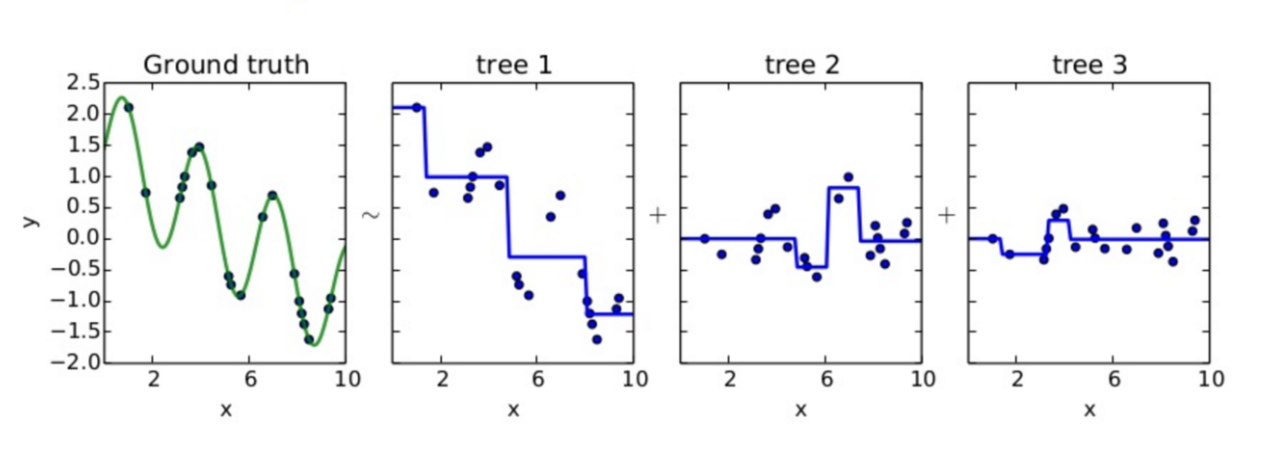

Source: https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5

# Actual GBM implementation

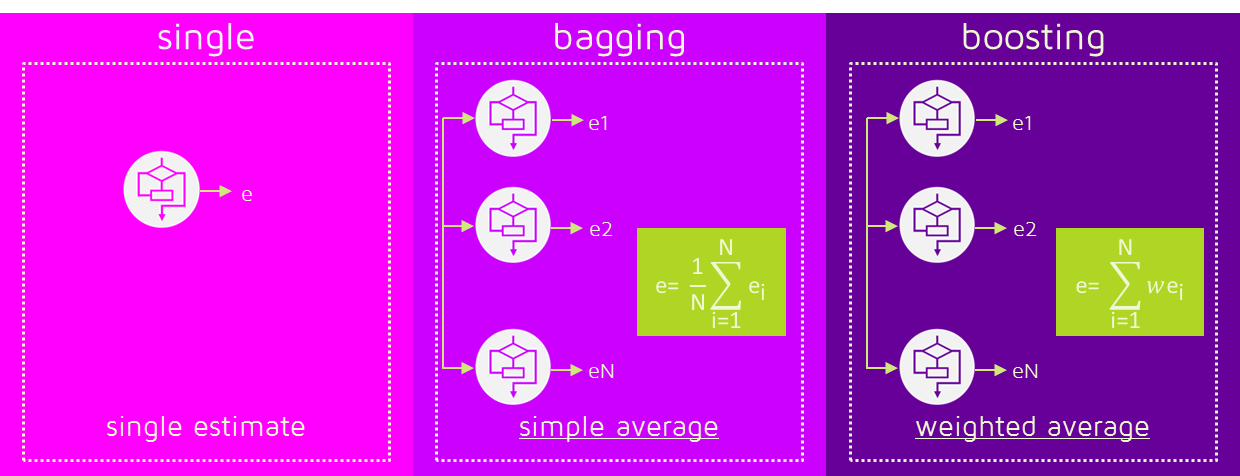

Source: https://www.kdnuggets.com/2017/11/difference-bagging-boosting.html

In real GBMs, all decision trees will rarely have the same weight. Instead, a parameter $\lambda$ is used to constrain how much information a given tree can provide to the overall estimate.

# Gradient boosting implementation in sklearn

In [15]:
clf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=100,max_depth=1)
#Fit the tree
clf = clf.fit(Xt,yt)
#Determine the accuracy when using the test dataset
print('Test data: %f' % clf.score(Xv,yv))

Test data: 0.572469


# Alternative: Adaboost

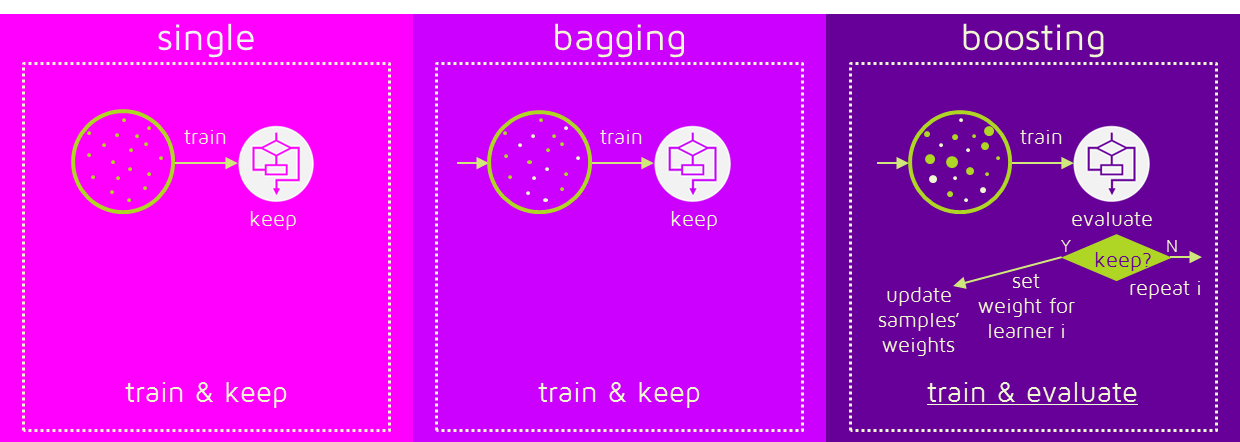

Source: https://www.kdnuggets.com/2017/11/difference-bagging-boosting.html

In [16]:
clf = sklearn.ensemble.AdaBoostRegressor(n_estimators=100)
#Fit the tree
clf = clf.fit(Xt,yt)
#Determine the accuracy when using the test dataset
print('Test data: %f' % clf.score(Xv,yv))

Test data: 0.588450


AdaBoost is more resistant to overfitting than Gradient Boosting

# K-fold cross validation for all these methods

In [17]:
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
#Define X
X = x[:,np.newaxis]
#Define the kfolds
kf = sklearn.model_selection.KFold(n_splits=10,shuffle=True)
#Decision tree
clf = sklearn.tree.DecisionTreeRegressor(random_state=1)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Decision tree: %f' % np.mean(scores))
clf = sklearn.ensemble.BaggingRegressor(n_estimators=100)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Bagging: %f' % np.mean(scores))
clf = sklearn.ensemble.RandomForestRegressor(n_estimators=100)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Random Forest: %f' % np.mean(scores))
clf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=100)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Gradient Boosting: %f' % np.mean(scores))
clf = sklearn.ensemble.AdaBoostRegressor(n_estimators=100)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('AdaBoost: %f' % np.mean(scores))

Decision tree: 0.202929
Bagging: 0.416709
Random Forest: 0.407676
Gradient Boosting: 0.596370
AdaBoost: 0.581717


# Be careful with overfitting

In general, Boosting will get you a lower bias than bagging methods but it is more prone to overfitting.

In other words, use with caution (and compute the optimal number of trees). 

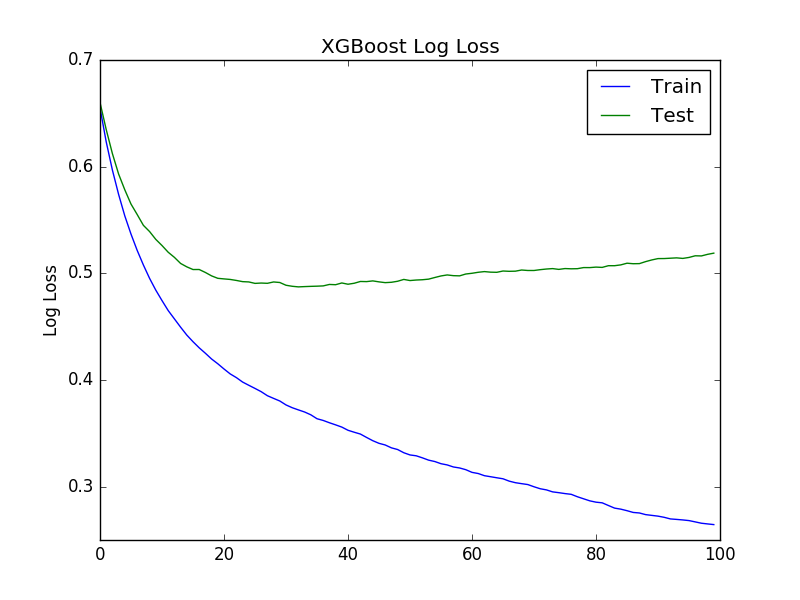

Source: https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

# Boosting for classification problems?

Here we explored its use for regression. It can also be used for classification. 

We chose regression because for boosting (in my opinion) it is easier to explan and understand.

# Want to dive deeper into boosting?

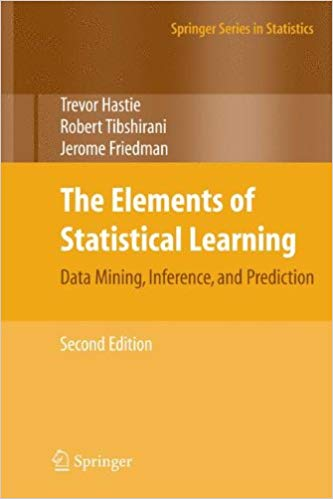

# Even deeper?

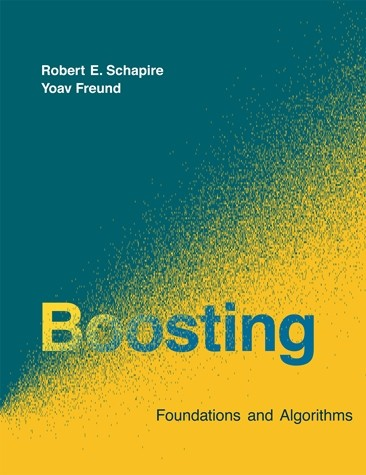

# Back to our land cover example

In [22]:
#Read in all the data
import rasterio
%matplotlib inline
import matplotlib.pyplot as plt
vars = ['WELD_Band1_TOA_REF','WELD_Band2_TOA_REF','WELD_Band3_TOA_REF','WELD_Band4_TOA_REF',
        'WELD_Band5_TOA_REF','WELD_Band61_TOA_BT','WELD_Band62_TOA_BT','WELD_Band7_TOA_REF',
        'WELD_NDVI_TOA','nlcd_land_cover','nlcd_impervious','nlcd_tree_canopy']
data = {}
for var in vars:
    src = rasterio.open('../Workspace/%s.tif' % var)
    data[var] = src.read(1)
    src.close()

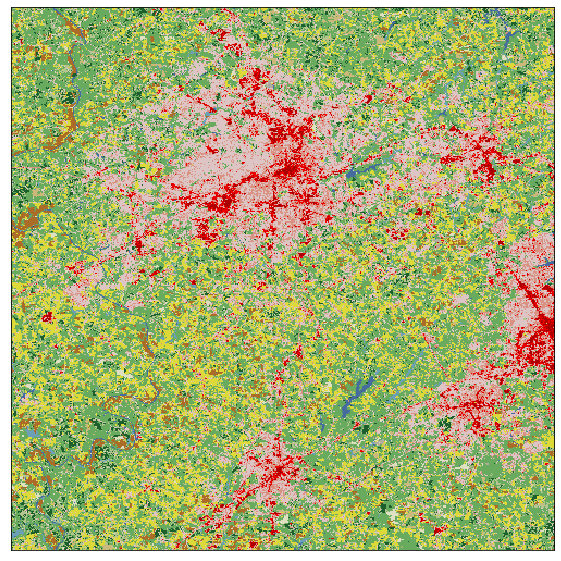

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import numpy as np
src = rasterio.open("../Workspace/nlcd_land_cover.tif")
data['nlcd_land_cover'] = src.read(1)

# colormap determination and setting bounds
with rasterio.open("../Workspace/nlcd_land_cover.tif") as r:
    cmap_in = r.colormap(1)
    cmap1 = [[np.int(jj) for jj in cmap_in[ii]] for ii in cmap_in]
    cmap_in = [[np.float(jj)/255.0 for jj in cmap_in[ii]] for ii in cmap_in]
    indx_list = np.unique(data['nlcd_land_cover'])
    r_cmap = []    
    for ii in indx_list:
        r_cmap.append(cmap_in[ii])
    raster_cmap = ListedColormap(r_cmap) # defining the NLCD specific color map
    norm = mpl.colors.BoundaryNorm(indx_list, raster_cmap.N) # specifying colors based on num. unique points
    
plt.figure(figsize=(10,10))
plt.imshow(data['nlcd_land_cover'],cmap=raster_cmap,norm=norm)
plt.xticks([])
plt.yticks([])
plt.show()
src.close()

# Random Forest

Accuracy: 0.7303506650544136


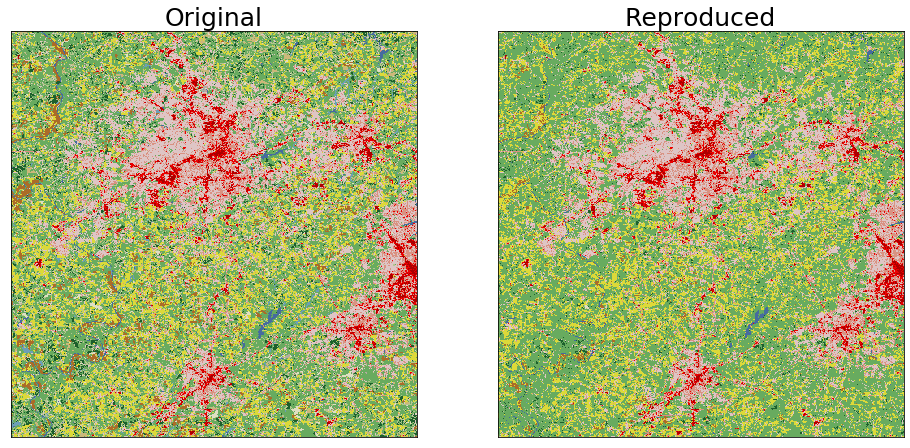

In [24]:
import sklearn.ensemble
variable = 'nlcd_land_cover'
#Bring in the data
X = []
feature_names = []
for var in data:
    if var == variable:continue
    tmp = data[var].reshape(data[var].size)
    X.append(tmp)
    feature_names.append(var)
X = np.array(X).T
Y = data[variable].reshape(data[variable].size)
#Draw 2500 samples to define the training dataset
np.random.seed(1)
idx = np.random.choice(Y.size,2500)
m = np.zeros(Y.size).astype(np.int)
m[idx] = 1
m = m.astype(np.bool)
#Random forest
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100,oob_score=True)
#Fit the tree
clf = clf.fit(X[m,:],Y[m])
#Assess the accuracy using the validation dataset
print('Accuracy:',clf.oob_score_)#score(X[~m,:],Y[~m]))
#Predict the classes at each pixel
Ypred = clf.predict(X[~m,:])
#Make the figure to compare the original to the reproduced
plt.figure(figsize=(16,28))
plt.subplot(122)
plt.title('Reproduced',fontsize=25)
plt.imshow(clf.predict(X).reshape(data['nlcd_land_cover'].shape),cmap=raster_cmap,norm=norm)
plt.xticks([])
plt.yticks([])
plt.subplot(121)
plt.title('Original',fontsize=25)
plt.imshow(data['nlcd_land_cover'],cmap=raster_cmap,norm=norm)
plt.xticks([])
plt.yticks([])
plt.show()

# Gradient Boosting

Accuracy: 0.7329336333776397


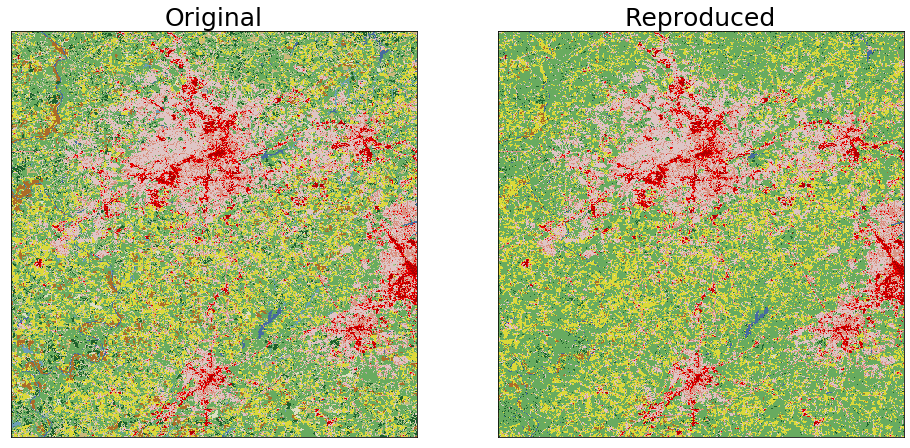

In [25]:
import sklearn.ensemble
variable = 'nlcd_land_cover'
#Bring in the data
X = []
feature_names = []
for var in data:
    if var == variable:continue
    tmp = data[var].reshape(data[var].size)
    X.append(tmp)
    feature_names.append(var)
X = np.array(X).T
Y = data[variable].reshape(data[variable].size)
#Draw 2500 samples to define the training dataset
np.random.seed(1)
idx = np.random.choice(Y.size,2500)
m = np.zeros(Y.size).astype(np.int)
m[idx] = 1
m = m.astype(np.bool)
#Random forest
clf = sklearn.ensemble.GradientBoostingClassifier(n_estimators=250,max_depth=1)
#Fit the tree
clf = clf.fit(X[m,:],Y[m])
#Assess the accuracy using the validation dataset
print('Accuracy:',clf.score(X[~m,:],Y[~m]))
#Predict the classes at each pixel
Ypred = clf.predict(X[~m,:])
#Make the figure to compare the original to the reproduced
plt.figure(figsize=(16,28))
plt.subplot(122)
plt.title('Reproduced',fontsize=25)
plt.imshow(clf.predict(X).reshape(data['nlcd_land_cover'].shape),cmap=raster_cmap,norm=norm)
plt.xticks([])
plt.yticks([])
plt.subplot(121)
plt.title('Original',fontsize=25)
plt.imshow(data['nlcd_land_cover'],cmap=raster_cmap,norm=norm)
plt.xticks([])
plt.yticks([])
plt.show()

# Random Forests or Boosting?

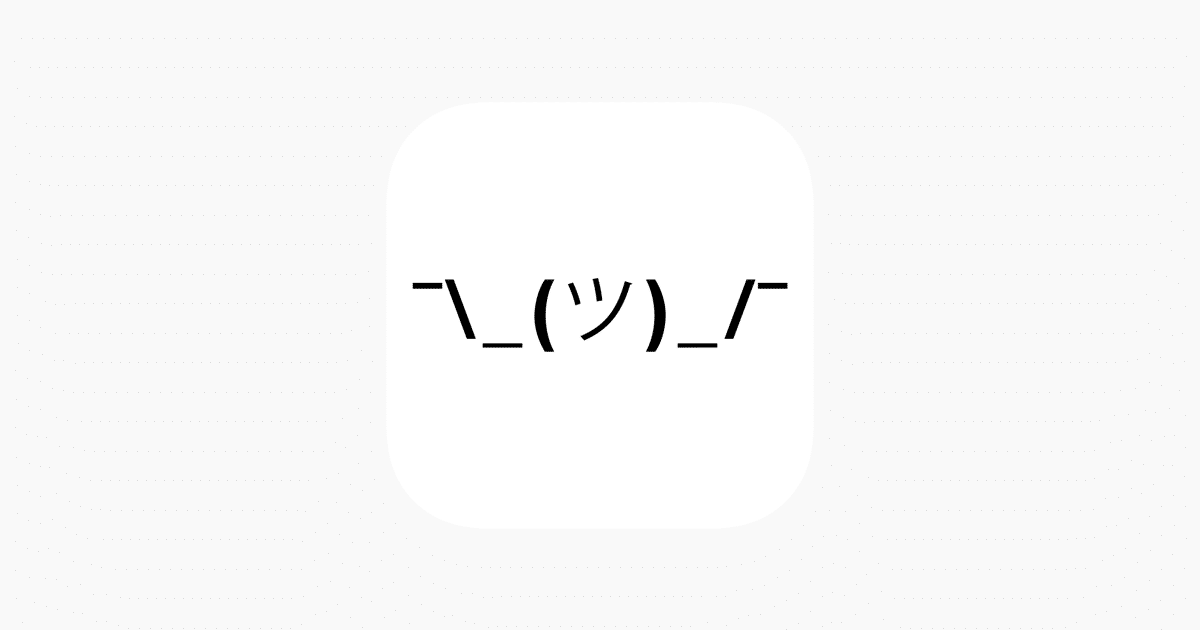

At a certain point, there is only so far that you can take decision trees. These methods keep evolving, but not much has changed lately.

As an outsider (I could be wrong!), it appears that most of the focus is going into Deep Learning  now. 

# End of Classification/Regression module

There is a lot more to learn
* Linear models
* Logistic regression
* Artificial neural networks
* Support vector machines
* ...

Many of them can be used for spatial prediction. Most of them have implementations within scikit-learn. 

# Remaining topics

* Geostatistics: Spatial interpolation
* Terrain analysis: Delineating streams
* Speeding up your code